In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.keras.preprocessing import image_dataset_from_directory
import cv2


In [2]:
BATCH_SIZE = 32
IMG_SIZE = (224, 224)
directory = "../Dataset/"
train_dataset = image_dataset_from_directory(directory,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE,
                                             validation_split=0.2,
                                             subset='training',
                                             seed=1)
validation_dataset = image_dataset_from_directory(directory,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE,
                                             validation_split=0.2,
                                             subset='validation',
                                             seed=1)

Found 7476 files belonging to 7 classes.
Using 5981 files for training.
Found 7476 files belonging to 7 classes.
Using 1495 files for validation.


In [3]:
IMG_SHAPE = IMG_SIZE + (3,)

In [4]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model

def waste_model(image_shape=IMG_SIZE):
    base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,include_top=False,weights='imagenet')
    base_model.trainable = False
    inputs = tf.keras.Input(shape=IMG_SHAPE)
    x = preprocess_input(inputs)
    x = base_model(x, training=False)
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.2)(x)
    prediction_layer = Dense(7, activation='softmax')
    outputs = prediction_layer(x)
    model = Model(inputs, outputs)
    return model

model = waste_model(IMG_SHAPE)

In [5]:
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 224, 224, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 224, 224, 3)      0         
 a)                                                              
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                      

In [6]:
base_learning_rate = 0.01
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

history = model.fit(train_dataset, epochs=5, validation_data=validation_dataset)

Epoch 1/5


C:\Users\Andy Xu\AppData\Roaming\Python\Python39\site-packages\keras\backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


187/187 [==============================] - 203s 1s/step - loss: 1.1235 - accuracy: 0.7136 - val_loss: 0.8097 - val_accuracy: 0.7833
Epoch 2/5
187/187 [==============================] - 177s 938ms/step - loss: 0.9028 - accuracy: 0.7763 - val_loss: 1.0663 - val_accuracy: 0.7652
Epoch 3/5
187/187 [==============================] - 181s 960ms/step - loss: 0.9353 - accuracy: 0.7847 - val_loss: 1.0742 - val_accuracy: 0.7873
Epoch 4/5
187/187 [==============================] - 161s 858ms/step - loss: 0.8440 - accuracy: 0.8071 - val_loss: 0.9658 - val_accuracy: 0.7946
Epoch 5/5
187/187 [==============================] - 165s 877ms/step - loss: 0.9002 - accuracy: 0.8062 - val_loss: 1.1558 - val_accuracy: 0.7866


In [7]:
model.save('waste_model.h5')

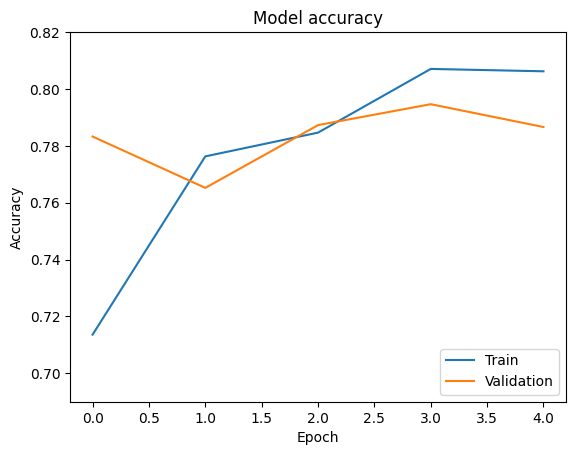

In [8]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.69, 0.82])
plt.legend(loc='lower right')
plt.show()